In [1]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
from qiskit import IBMQ
import matplotlib
%matplotlib inline

In [2]:

token = "38982bb48cc7cc47dc1ed86a5730f1f19534098ec1813dfa9586a825bd6124a10c6ec8a2d59fb18bc275effa766315e7ec858ecfce18633af5fbbdd136dccb51"
#IBMQ.save_account(token)


In [3]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
secret_number= "101001110"



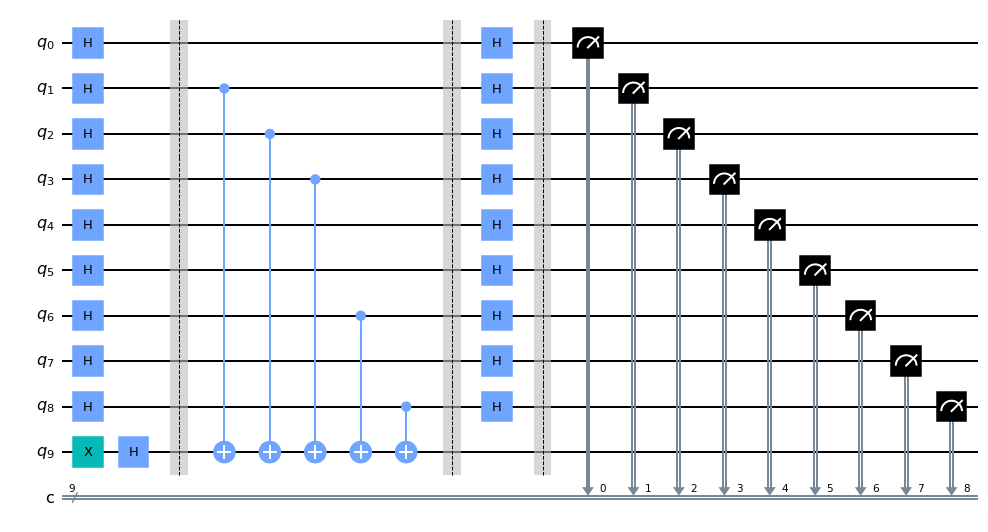

In [15]:
circuit = QuantumCircuit(len(secret_number)+1,len(secret_number)) # 6 + 1 qubits, 6 classical bits
circuit.h(range(len(secret_number)))
circuit.x(len(secret_number))
circuit.h(len(secret_number))

circuit.barrier()
for i, bits in enumerate(reversed(secret_number)):
    if bits == "1":
        circuit.cx(i,len(secret_number))
circuit.barrier()

circuit.h(range(len(secret_number)))
circuit.barrier()
circuit.measure(range(len(secret_number)),range(len(secret_number)))
circuit.draw(output= "mpl")

In [16]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend= simulator, shots=1).result()
counts = result.get_counts()
print(counts)


{'101001110': 1}
